In [5]:
# !pip install catboost

In [2]:
# Import Dependiences
%matplotlib inline

# Start Python Import
import math
import time
import random
import datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# Warnings
import warnings
warnings.filterwarnings('ignore')

'''
# Colab - use only in google colab
from google.colab import output
output.enable_custom_widget_manager()
from google.colab import output
output.disable_custom_widget_manager()
'''

'\n# Colab - use only in google colab\nfrom google.colab import output\noutput.enable_custom_widget_manager()\nfrom google.colab import output\noutput.disable_custom_widget_manager()\n'

In [6]:
# Import train & test data
# _train = pd.read_csv('https://github.com/MarekLas/kaggle_titanic/main/raw_data/train.csv')
# _test = pd.read_csv('https://github.com/MarekLas/kaggle_titanic/main/raw_data/test.csv')
gender_submission = pd.read_csv('https://github.com/MarekLas/kaggle_titanic/main/raw_data/submission.csv')

HTTPError: HTTP Error 404: Not Found

In [ ]:
# Copy of the data
train = _train.copy()
test = _test.copy()

In [ ]:
# View the training data
train.head()

In [136]:
# View the test data
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [137]:
# view the example submission datarame
gender_submission.head()

<<<<<<< HEAD
PassengerId     Survived
892                    0
893                    1
894                    0
895                    0

In [138]:
len(train)

891

In [139]:
len(test)

418

In [140]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 322.0 KB


In [141]:
# Check for duplicated rows
train.duplicated().sum()

0

In [142]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

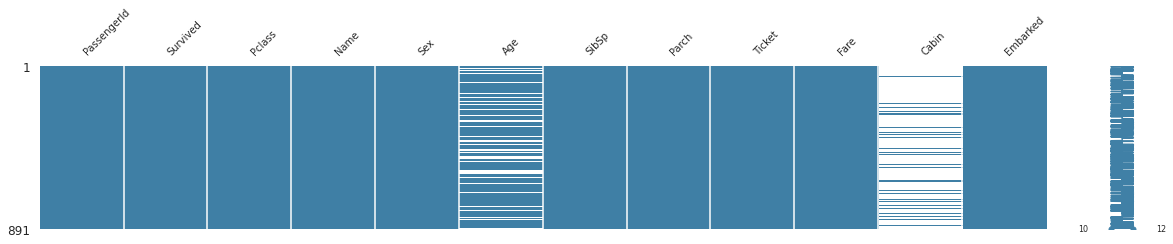

In [143]:
# Plot graphic of missing values
missingno.matrix(train,figsize = (20,3), color=(0.25,0.5,0.65), fontsize=10);

In [144]:
train[train.isnull().any(axis=1)]

PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S  
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
4      male  35.0      0      0            373450   8.0500   NaN        S  
5      male   NaN      0      0            330877   8.4583   NaN        Q  
7      male   2.0      3      1            349909  21.0750   NaN        S  
..      ...   ...    ...    ...               ...      ...   ...      ...  
884    male  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S  
885  female  39.0      0      5            382652  29.1250   NaN        Q  
886    male  27.0      0      0            211536  13.0000   NaN        S  
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S  
890    male  32.0      0      0            370376   7.7500   NaN        Q  

[708 rows x 12 columns]

In [145]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [146]:
# Easy function for quick checkin missing values
def missing_values (target_column):
    print(train[target_column].isnull().sum())

In [147]:
# Different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

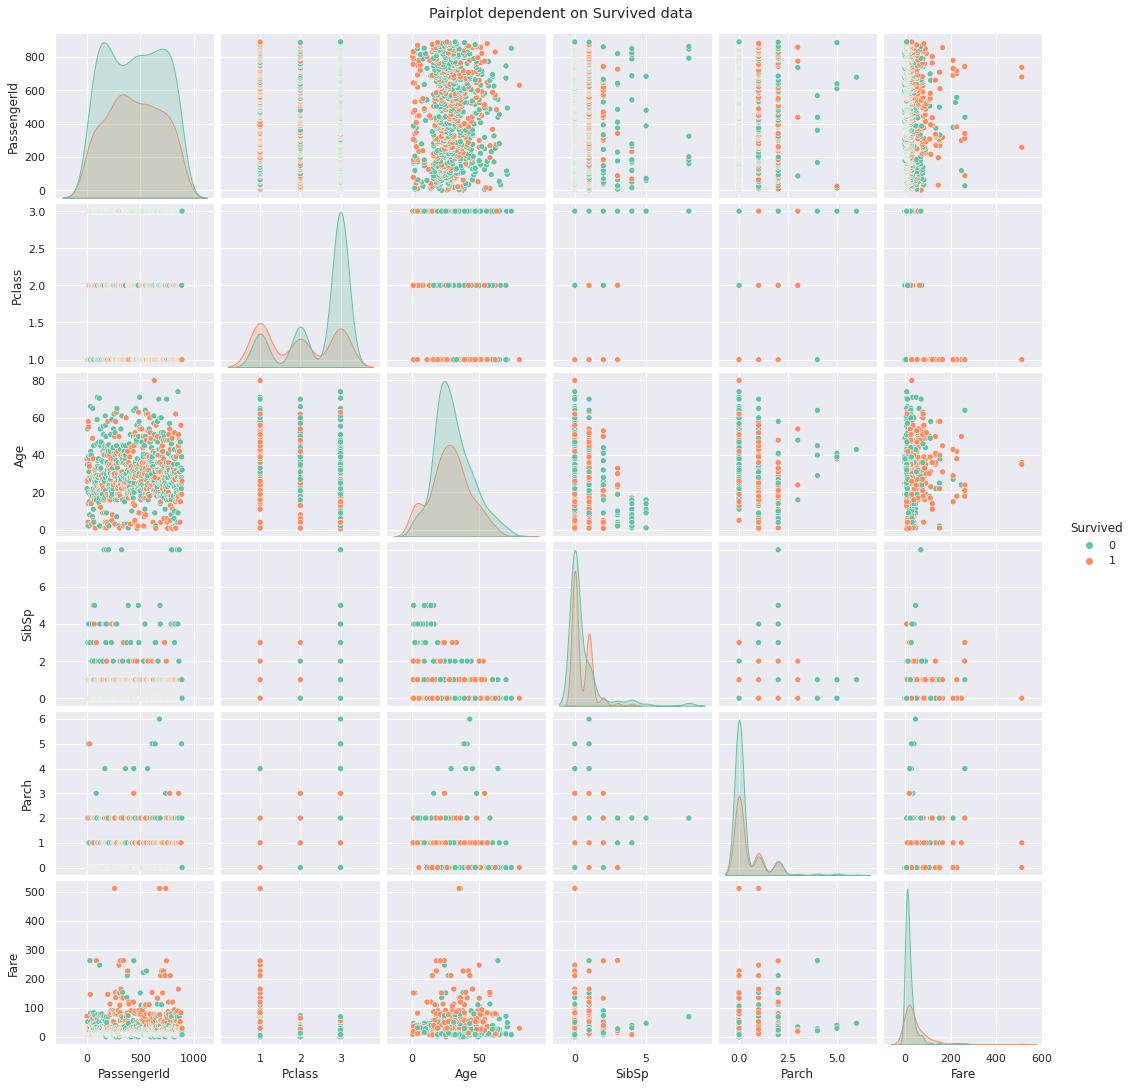

In [148]:
# Check for the dependencies in the data
sns.set_theme(style='darkgrid')
_=sns.pairplot(train,hue='Survived', palette = "Set2").fig.suptitle("Pairplot dependent on Survived data", y=1.01) # y= some height>1(title='');

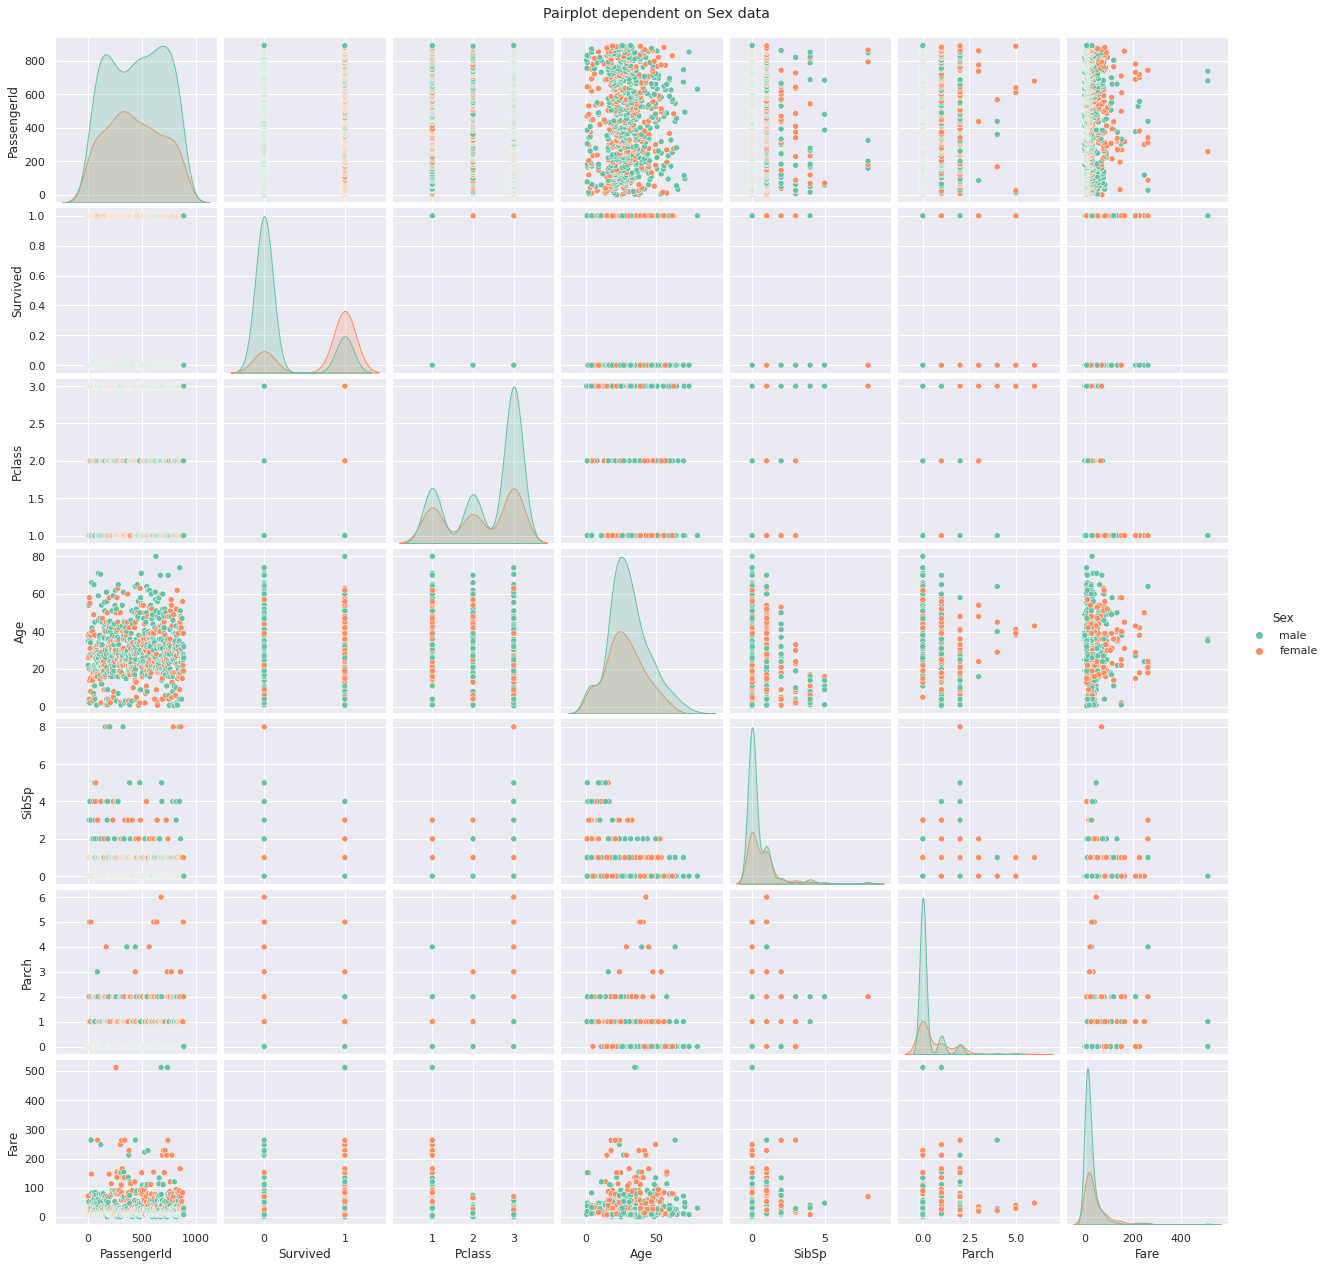

In [149]:
sns.set_theme(style='darkgrid')
_=sns.pairplot(train,hue='Sex', palette = "Set2").fig.suptitle("Pairplot dependent on Sex data", y=1.01)

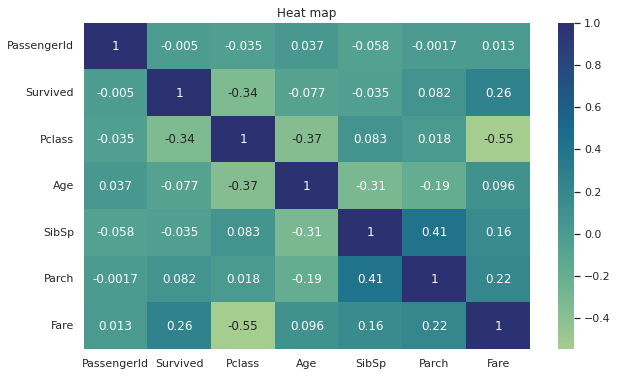

In [150]:
# Dependency checking
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
_=sns.heatmap(train.corr(), annot=True, cmap="crest").set(title="Heat map");

In [151]:
# Create subset data frames for discretised and continous variables
df_bin = pd.DataFrame() # for discretised variables
df_con = pd.DataFrame() # for continous variables

## Target Feature: Survived
Description: Whether the passenger survived or not
Key: 0 = did not survive, 1 = survived.

This is the variable we want our machine learning model to predict based off all others.

0    549
1    342
Name: Survived, dtype: int64


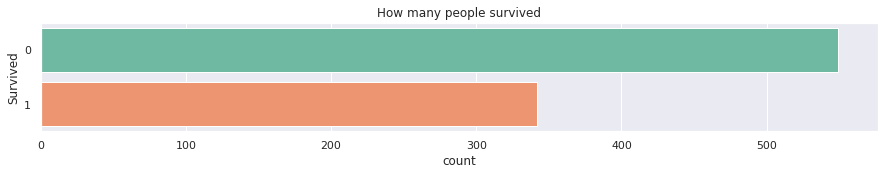

In [154]:
# How many people survived?
fig = plt.figure(figsize=(15,2))
sns.set_theme(style='darkgrid')
sns.countplot(y='Survived', data=train,saturation = 0.80, palette = "Set2").set(title="How many people survived");
print(train.Survived.value_counts())

In [155]:
# Let's add this to our subset dataframe
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [156]:
# Function survived counting
def get_counts(dataframe, factor, quality, status):
    '''
    dataframe - the dataframe on which to apply the function (e.g. 'train' for the Titanic dataframe)
    factor - the column on which to perform the analysis (e.g. 'Pclass' for the ticket class)
    quality - the quality on which to perform the analysis (e.g '3' for the third class)
    status - the status you want to count: survival or death. Should be a Boolean (1 for survival, 0 for death).
    '''
    target = dataframe[factor].where(dataframe[factor] == quality)
    class_count = target.where(dataframe['Survived'] == status).count()
    return class_count

## Feature: Pclass
Description: The ticket class of the passanger.

Key: 1 = 1st, 2 = 2nd, 3 = 3rd

In [157]:
# Check missing values
missing_values('Pclass')

0


In [158]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64


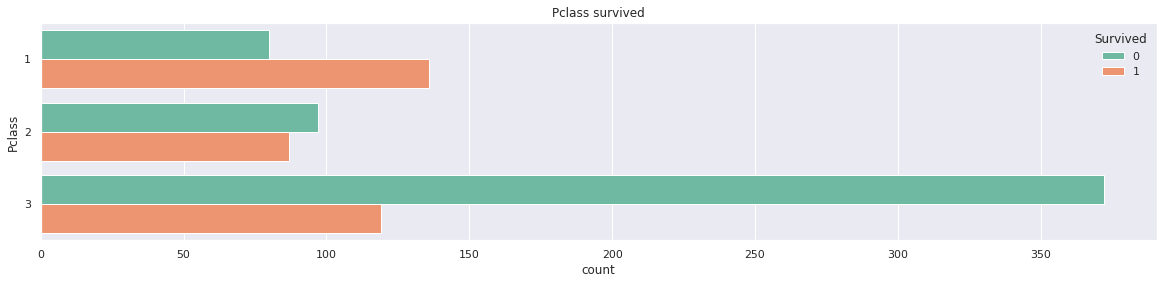

In [159]:
fig = plt.figure(figsize=(20,4));
sns.set_theme(style='darkgrid');
sns.countplot(y='Pclass', data=train,saturation = 0.80,hue='Survived', palette = "Set2").set(title="Pclass survived");
print(train.Pclass.value_counts())

In [160]:
pclass1_survival_count = get_counts(train, 'Pclass', 1, 1)
pclass1_death_count = get_counts(train, 'Pclass', 1, 0)
pclass2_survival_count = get_counts(train, 'Pclass', 2, 1)
pclass2_death_count = get_counts(train, 'Pclass', 2, 0)
pclass3_survival_count = get_counts(train, 'Pclass', 3, 1)
pclass3_death_count = get_counts(train, 'Pclass', 3, 0)
print(f'Number of first class passenger who survive = {pclass1_survival_count}')
print(f'Number of first class passenger who not survive = {pclass1_death_count}')
print(f'Number of second class passenger who survive = {pclass2_survival_count}')
print(f'Number of second class passenger who not survive = {pclass2_death_count}')
print(f'Number of third class passenger who survive = {pclass3_survival_count}')
print(f'Number of third class passenger who not survive = {pclass3_death_count}')

Number of first class passenger who survive = 136
Number of first class passenger who not survive = 80
Number of second class passenger who survive = 87
Number of second class passenger who not survive = 97
Number of third class passenger who survive = 119
Number of third class passenger who not survive = 372


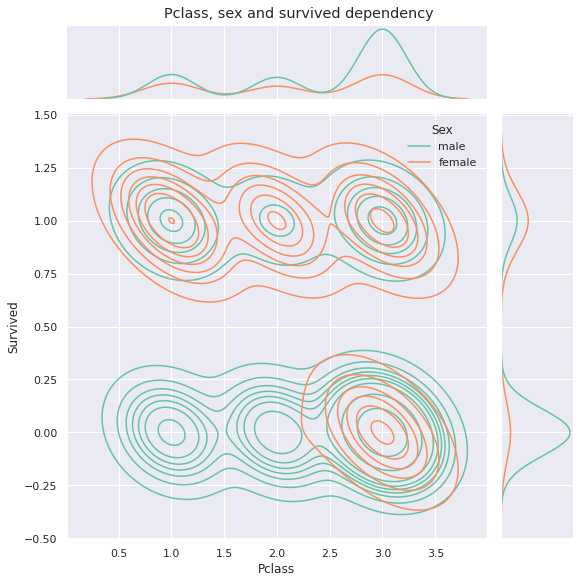

In [161]:
sns.jointplot(x='Pclass' , y='Survived' , data=train , size=8, kind='kde', hue='Sex', palette = "Set2").fig.suptitle("Pclass, sex and survived dependency", y=1.01);
sns.set_theme(style='darkgrid')

In [162]:
pclass_chances = train.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
pclass_chances

Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
Name: Survived, dtype: float64

In [164]:
print(f"Chance to survive depending only on the ticket class for female in the first class - {pclass_chances.female[1]:.0f} %")
print(f"Chance to survive depending only on for the ticket pclass for female in the second class - {pclass_chances.female[2]:.0f} %")
print(f"Chance to survive depending only on the ticket  pclass for female in the third class -  {pclass_chances.female[3]:.0f} %")
print(f"Chance to survive depending only on the ticket pclass for male in the first class -  {pclass_chances.male[1]:.0f} %")
print(f"Chance to survive depending only on the ticket pclass for male in the second class -  {pclass_chances.male[2]:.0f} %")
print(f"Chance to survive depending only on the ticket pclass for male in the third class -  {pclass_chances.male[3]:.0f} %")

Chance to survive depending only on the ticket class for female in the first class - 97 %
Chance to survive depending only on for the ticket pclass for female in the second class - 92 %
Chance to survive depending only on the ticket  pclass for female in the third class -  50 %
Chance to survive depending only on the ticket pclass for male in the first class -  37 %
Chance to survive depending only on the ticket pclass for male in the second class -  16 %
Chance to survive depending only on the ticket pclass for male in the third class -  14 %


In [165]:
# Let's add this to our subset dataframe
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

## Feature: Name
Description: The name of the passenger

In [166]:
# Check for the missing values
missing_values('Name')

0


In [167]:
# Check for the duplicates
train['Name'].duplicated().sum()

0

In [168]:
# Values count
train['Name'].count().sum()

891

## Feature: Sex
Description: The sex of the passenger (male or female)

male      577
female    314
Name: Sex, dtype: int64


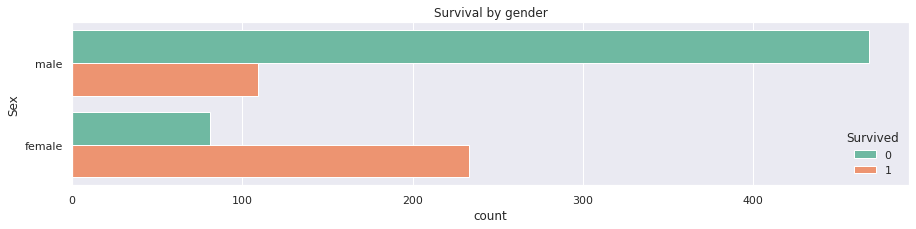

In [169]:
fig = plt.figure(figsize=(15,3))
sns.set_theme(style='darkgrid')
sns.countplot(y='Sex', data=train,saturation = 0.80,hue='Survived', palette = "Set2").set(title="Survival by gender");
print(train.Sex.value_counts())

In [37]:
female_survival_count = get_counts(train, 'Sex', 'female', 1)
male_survival_count = get_counts(train, 'Sex', 'male', 1)
female_death_count = get_counts(train, 'Sex', 'female', 0)
male_death_count = get_counts(train, 'Sex', 'male', 0)

In [170]:
print(f'Number of female who survived = {female_survival_count}')
print(f'Number of female who not survived = {female_death_count}')
print(f'Number of male who survived = {male_survival_count}')
print(f'Number of male who not survived = {male_death_count}')

Number of female who survived = 233
Number of female who not survived = 81
Number of male who survived = 109
Number of male who not survived = 468


In [171]:
# Let's add this to our subset dataframe
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0)

df_con['Sex'] = train['Sex']

## Feature: Age

In [172]:
# Check for the missing values
missing_values('Age')

177


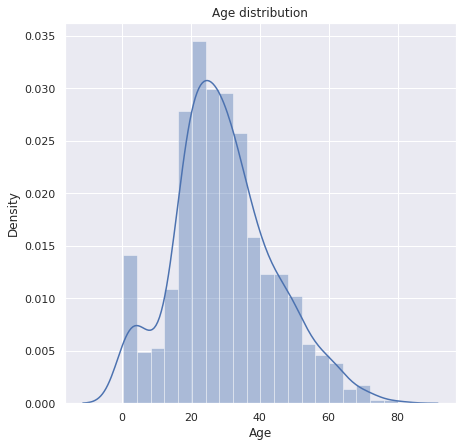

In [173]:
plt.figure(figsize=(7,7))
sns.distplot(train['Age']).set(title="Age distribution");

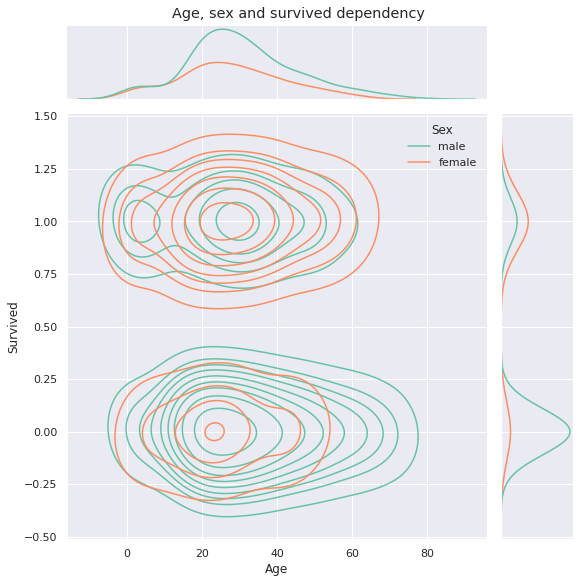

In [174]:
sns.jointplot(x='Age' , y='Survived' , data=train , size=8, kind='kde', hue='Sex', palette = "Set2").fig.suptitle("Age, sex and survived dependency", y=1.01);

In [175]:
# Fill the missing values
train_age_isnull = train[train["Age"].isnull()]
train_age_isnull.head()

PassengerId  Survived  Pclass                           Name     Sex  Age  \
5             6         0       3               Moran, Mr. James    male  NaN   
17           18         1       2   Williams, Mr. Charles Eugene    male  NaN   
19           20         1       3        Masselmani, Mrs. Fatima  female  NaN   
26           27         0       3        Emir, Mr. Farred Chehab    male  NaN   
28           29         1       3  O'Dwyer, Miss. Ellen "Nellie"  female  NaN   

    SibSp  Parch  Ticket     Fare Cabin Embarked  
5       0      0  330877   8.4583   NaN        Q  
17      0      0  244373  13.0000   NaN        S  
19      0      0    2649   7.2250   NaN        C  
26      0      0    2631   7.2250   NaN        C  
28      0      0  330959   7.8792   NaN        Q

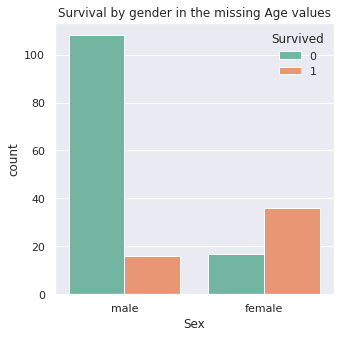

In [176]:
plt.figure(figsize=(5,5))
sns.countplot(x='Sex', data=train_age_isnull, hue='Survived',palette = "Set2").set(title="Survival by gender in the missing Age values");

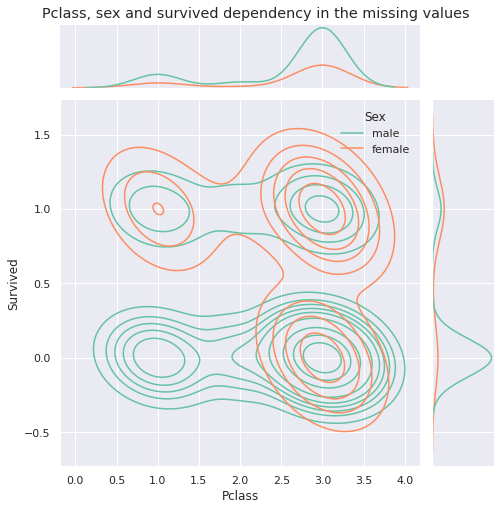

In [177]:
sns.jointplot(x='Pclass' , y='Survived' , data=train_age_isnull , size=7, kind='kde', hue='Sex', palette = "Set2").fig.suptitle("Pclass, sex and survived dependency in the missing values", y=1.01);
sns.set_theme(style='darkgrid')

In [178]:
# Mean age in the different groups
mean_age_by_sex=train.dropna().groupby("Sex")['Age'].mean()

In [179]:
mean_age_by_sex

Sex
female    32.676136
male      38.451789
Name: Age, dtype: float64

In [180]:
mean_age_by_pclass=train.dropna().groupby("Pclass")['Age'].mean()

In [181]:
mean_age_by_pclass

Pclass
1    37.591266
2    25.266667
3    21.000000
Name: Age, dtype: float64

In [182]:
mean_age_by_pclass_sex=train.dropna().groupby(["Pclass","Sex"])['Age'].mean()

In [183]:
mean_age_by_pclass_sex

Pclass  Sex   
1       female    34.094595
        male      40.671667
2       female    29.611111
        male      18.750000
3       female    17.200000
        male      24.800000
Name: Age, dtype: float64

In [184]:
mean_age_by_pclass_sex_survived=train.dropna().groupby(["Pclass","Sex","Survived"])['Age'].mean()

In [185]:
mean_age_by_pclass_sex_survived

Pclass  Sex     Survived
1       female  0           25.666667
                1           34.450704
        male    0           44.030612
                1           35.969143
2       female  0           57.000000
                1           26.187500
        male    0           36.250000
                1           10.000000
3       female  0           15.500000
                1           18.333333
        male    0           28.666667
                1           19.000000
Name: Age, dtype: float64

In [186]:
# Function to fill the column Age with mean age values depending on the data groups: Pclass and Sex
def categorise(row):
  if np.isnan(row['Age']):
    if row['Pclass'] == 1 and row['Sex'] == 'female':
      return mean_age_by_pclass_sex[1].female
    if row['Pclass'] == 1 and row['Sex'] == 'male':
      return mean_age_by_pclass_sex[1].male
    if row['Pclass'] == 2 and row['Sex'] == 'female':
      return mean_age_by_pclass_sex[2].female
    if row['Pclass'] == 2 and row['Sex'] == 'male':
      return mean_age_by_pclass_sex[2].male
    if row['Pclass'] == 3 and row['Sex'] == 'female':
      return mean_age_by_pclass_sex[3].female
    if row['Pclass'] == 3 and row['Sex'] == 'male':
      return mean_age_by_pclass_sex[3].male
  else:
    return row['Age']

In [187]:
# Filling the data
train['Age_Full'] = train.apply(lambda row: categorise(row), axis=1)
train['Age_Full'] = train['Age_Full'].astype('int')
train.drop('Age', axis=1, inplace=True)
train.rename(columns = {'Age_Full': 'Age'}, inplace=True)

In [188]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare Cabin Embarked  Age  
0         A/5 21171   7.2500   NaN        S   22  
1          PC 17599  71.2833   C85        C   38  
2  STON/O2. 3101282   7.9250   NaN        S   26  
3            113803  53.1000  C123        S   35  
4            373450   8.0500   NaN        S   35

In [189]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age              0
dtype: int64

In [190]:
# Let's add this to our continous subset dataframe
df_con['Age'] = train['Age']

In [191]:
train['Age'].min()

0

In [192]:
train['Age'].max()

80

In [193]:
# Let's divide age into eight groups
train['Age']=pd.cut(train['Age'], 8)

In [194]:
# Round fisrt interval to 0 value
first_I = train['Age'].cat.categories[0]
new_I = pd.Interval(0, first_I.right)
train['Age'] = train['Age'].cat.rename_categories({first_I: new_I})

In [63]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare Cabin Embarked           Age  
0         A/5 21171   7.2500   NaN        S  (20.0, 30.0]  
1          PC 17599  71.2833   C85        C  (30.0, 40.0]  
2  STON/O2. 3101282   7.9250   NaN        S  (20.0, 30.0]  
3            113803  53.1000  C123        S  (30.0, 40.0]  
4            373450   8.0500   NaN        S  (30.0, 40.0]

In [64]:
# Let's count the intervals values
train.Age.value_counts()

(20.0, 30.0]    327
(30.0, 40.0]    185
(10.0, 20.0]    167
(40.0, 50.0]     84
(0.0, 10.0]      64
(50.0, 60.0]     42
(60.0, 70.0]     18
(70.0, 80.0]      4
Name: Age, dtype: int64

In [195]:
# Let's add this to our bin subset dataframe
df_bin['Age'] = train['Age']

## Feature SibSp
Description: The number of siblings the passenger has aboard the Titanic

In [196]:
# Check for the missing values
missing_values('SibSp')

0


In [197]:
# What values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

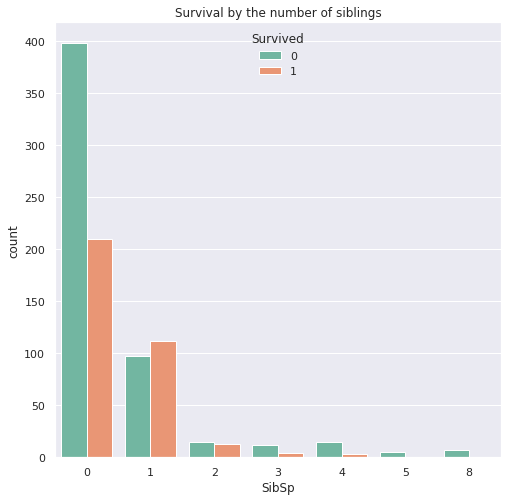

In [198]:
plt.figure(figsize=(8,8))
sns.set_theme(style='darkgrid')
sns.countplot(x='SibSp', data=train, hue='Survived', palette = "Set2").set(title="Survival by the number of siblings");

In [199]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

## Feature: Parch
Description: The number of parent/childeren the passenger has aboard the Titinic.

In [200]:
# Check for the missing values
missing_values('Parch')

0


In [201]:
# What values are there?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

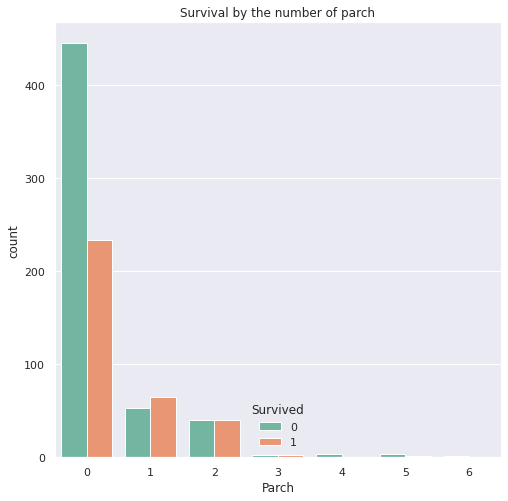

In [202]:
plt.figure(figsize=(8,8))
sns.set_theme(style='darkgrid')
sns.countplot(x='Parch', data=train, hue='Survived', palette = "Set2").set(title="Survival by the number of parch");

In [203]:
# Add SibSp to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

In [204]:
df_con.head()

Survived  Pclass     Sex  Age  SibSp  Parch
0         0       3    male   22      1      0
1         1       1  female   38      1      0
2         1       3  female   26      0      0
3         1       1  female   35      1      0
4         0       3    male   35      0      0

In [205]:
df_bin.head()

Survived  Pclass  Sex           Age  SibSp  Parch
0         0       3    0  (20.0, 30.0]      1      0
1         1       1    1  (30.0, 40.0]      1      0
2         1       3    1  (20.0, 30.0]      0      0
3         1       1    1  (30.0, 40.0]      1      0
4         0       3    0  (30.0, 40.0]      0      0

## Feature: Ticket
Description: The ticket number of the boarding passanger.

In [206]:
# Check for the missing values
missing_values('Ticket')

0


In [207]:
# How many kind of tickets are there?
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

## Feature: Fare
Description: How much the ticket cost.

In [208]:
# How many missing values
missing_values("Fare")

0


In [209]:
# How many categories of fare are there?
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [210]:
train.Fare.max()

512.3292

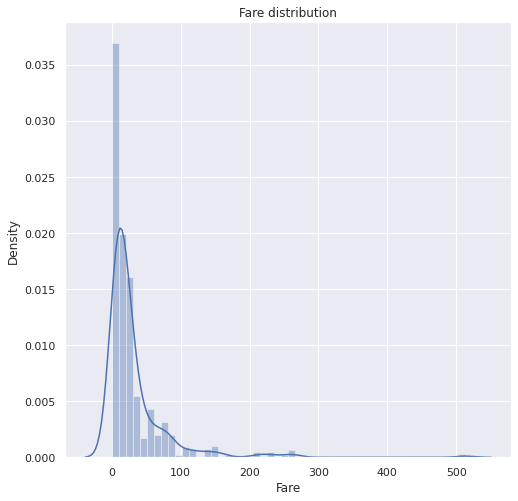

In [211]:
plt.figure(figsize=(8,8))
sns.set_theme(style='darkgrid')
sns.distplot(train['Fare']).set(title="Fare distribution");

In [212]:
# Add Fare to continous subset dataframes
df_con['Fare'] = train['Fare']

In [213]:
# Cut data to 5 Fare categories
train['Fare']=pd.cut(train['Fare'], 5)

In [214]:
# Round first interval to left value 0
first_I = train['Fare'].cat.categories[0]
new_I = pd.Interval(0, first_I.right)
train['Fare'] = train['Fare'].cat.rename_categories({first_I: new_I})

In [215]:
# Let's count the intervals values
train.Fare.value_counts()

(0.0, 102.466]        838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [216]:
# Add Fare to bib subset dataframes
df_bin['Fare'] = train['Fare']

In [217]:
df_con.head()

Survived  Pclass     Sex  Age  SibSp  Parch     Fare
0         0       3    male   22      1      0   7.2500
1         1       1  female   38      1      0  71.2833
2         1       3  female   26      0      0   7.9250
3         1       1  female   35      1      0  53.1000
4         0       3    male   35      0      0   8.0500

In [218]:
df_bin.head()

Survived  Pclass  Sex           Age  SibSp  Parch            Fare
0         0       3    0  (20.0, 30.0]      1      0  (0.0, 102.466]
1         1       1    1  (30.0, 40.0]      1      0  (0.0, 102.466]
2         1       3    1  (20.0, 30.0]      0      0  (0.0, 102.466]
3         1       1    1  (30.0, 40.0]      1      0  (0.0, 102.466]
4         0       3    0  (30.0, 40.0]      0      0  (0.0, 102.466]

## Feature: Cabin
Description: The cabin number where the passanger was staying

In [219]:
# How many missing values
missing_values("Cabin")

687


In [220]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket            Fare Cabin Embarked           Age  
0         A/5 21171  (0.0, 102.466]   NaN        S  (20.0, 30.0]  
1          PC 17599  (0.0, 102.466]   C85        C  (30.0, 40.0]  
2  STON/O2. 3101282  (0.0, 102.466]   NaN        S  (20.0, 30.0]  
3            113803  (0.0, 102.466]  C123        S  (30.0, 40.0]  
4            373450  (0.0, 102.466]   NaN        S  (30.0, 40.0]

In [221]:
# I decided to drop the Cabin column, becose the are too many missing data.
train = train.drop(['Cabin'], axis=1)

In [222]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket            Fare Embarked           Age  
0         A/5 21171  (0.0, 102.466]        S  (20.0, 30.0]  
1          PC 17599  (0.0, 102.466]        C  (30.0, 40.0]  
2  STON/O2. 3101282  (0.0, 102.466]        S  (20.0, 30.0]  
3            113803  (0.0, 102.466]        S  (30.0, 40.0]  
4            373450  (0.0, 102.466]        S  (30.0, 40.0]

## Feature: Embarked
Description: The port where the passenger baoarded the Titinic.
Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [223]:
# How many missing values?
missing_values('Embarked')

2


In [224]:
train[train.isnull().any(axis=1)]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex  SibSp  Parch  Ticket            Fare Embarked           Age  
61   female      0      0  113572  (0.0, 102.466]      NaN  (30.0, 40.0]  
829  female      0      0  113572  (0.0, 102.466]      NaN  (60.0, 70.0]

In [225]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [226]:
# Fill the gaps with the most common value
train['Embarked'].fillna(value="S", inplace=True)

In [227]:
missing_values('Embarked')

0


In [228]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

male      577
female    314
Name: Sex, dtype: int64


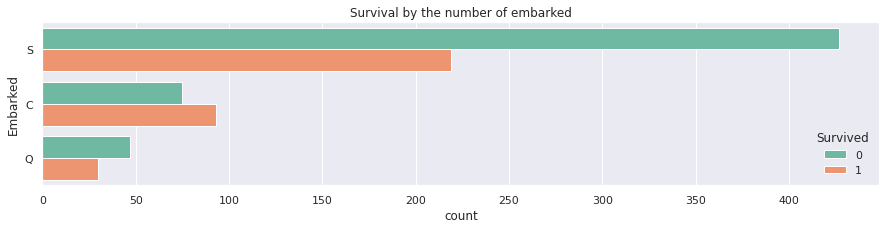

In [230]:
fig = plt.figure(figsize=(15,3))
sns.set_theme(style='darkgrid')
sns.countplot(y='Embarked', data=train,saturation = 0.80,hue='Survived', palette = "Set2").set(title="Survival by the number of embarked");
print(train.Sex.value_counts())

In [231]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

## One hot encoding

In [232]:
df_bin.head()

Survived  Pclass  Sex           Age  SibSp  Parch            Fare Embarked
0         0       3    0  (20.0, 30.0]      1      0  (0.0, 102.466]        S
1         1       1    1  (30.0, 40.0]      1      0  (0.0, 102.466]        C
2         1       3    1  (20.0, 30.0]      0      0  (0.0, 102.466]        S
3         1       1    1  (30.0, 40.0]      1      0  (0.0, 102.466]        S
4         0       3    0  (30.0, 40.0]      0      0  (0.0, 102.466]        S

In [233]:
df_con.head()

Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked
0         0       3    male   22      1      0   7.2500        S
1         1       1  female   38      1      0  71.2833        C
2         1       3  female   26      0      0   7.9250        S
3         1       1  female   35      1      0  53.1000        S
4         0       3    male   35      0      0   8.0500        S

In [234]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    category
 9   Embarked     891 non-null    object  
 10  Age          891 non-null    category
dtypes: category(2), int64(5), object(4)
memory usage: 65.2+ KB


In [235]:
# One hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [236]:
one_hot_cols.remove('Survived')

In [237]:
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)
df_bin_enc.head()

Survived  Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  Age_(0.0, 10.0]  \
0         0         0         0         1      1      0                0   
1         1         1         0         0      0      1                0   
2         1         0         0         1      0      1                0   
3         1         1         0         0      0      1                0   
4         0         0         0         1      1      0                0   

   Age_(10.0, 20.0]  Age_(20.0, 30.0]  Age_(30.0, 40.0]  ...  Parch_5  \
0                 0                 1                 0  ...        0   
1                 0                 0                 1  ...        0   
2                 0                 1                 0  ...        0   
3                 0                 0                 1  ...        0   
4                 0                 0                 1  ...        0   

   Parch_6  Fare_(0.0, 102.466]  Fare_(102.466, 204.932]  \
0        0                    1                        0   
1        0                    1                        0   
2        0                    1                        0   
3        0                    1                        0   
4        0                    1                        0   

   Fare_(204.932, 307.398]  Fare_(307.398, 409.863]  Fare_(409.863, 512.329]  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1  

[5 rows x 36 columns]

## Label continous values

In [238]:
# Label Encode all continous values using LabelEncoder()
df_con.head()

Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked
0         0       3    male   22      1      0   7.2500        S
1         1       1  female   38      1      0  71.2833        C
2         1       3  female   26      0      0   7.9250        S
3         1       1  female   35      1      0  53.1000        S
4         0       3    male   35      0      0   8.0500        S

In [239]:
# Continous data after using LabelEncoder()
df_con_enc = df_con.apply(LabelEncoder().fit_transform)
df_con_enc.head()

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         0       2    1   22      1      0    18         2
1         1       0    0   38      1      0   207         0
2         1       2    0   26      0      0    41         2
3         1       0    0   35      1      0   189         2
4         0       2    1   35      0      0    43         2

## Machine Learning Models

In [245]:
# Select the dataframe we want to use first for predictions. 
selected_df = df_con_enc

In [246]:
# Split the train dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) #data
y_train = selected_df.Survived #labels

In [247]:
X_train.shape

(891, 7)

In [248]:
y_train.shape

(891,)

In [249]:
# Scaling values 
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train_scaled.shape

(891, 7)

### Function to fit the model and return the accuracy scores

In [253]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)

    # Cross Validaton
    train_pred= model_selection.cross_val_predict(algo,
                                                  X_train,
                                                  y_train,
                                                  cv=cv,
                                                  n_jobs=-1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) *100, 2)
    
    return train_pred, acc, acc_cv

### Logistic regression

In [254]:
# GridSearch() to find best parameters
grid={"C": np.logspace(-3,3,7), 
      "penalty": ["l1","l2", "elasticnet"],
      "max_iter": [100, 200, 500],
      "solver":  ['liblinear','newton-cg', 'newton-cholesky', 'sag', 'saga'] }
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_scaled,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.7957553058676654


In [255]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(C=0.01, max_iter=100, penalty='l2', solver ='newton-cg'),
                                                  X_train_scaled,
                                                  y_train,
                                                  10)
log_time = (time.time() - start_time)
print('Accuraccu: {0:.2f}'.format(acc_log))
print('Accuracy CV 10-Fold: {0:.2f}'.format(acc_cv_log))
print('Runnning Time: {}'.format(datetime.timedelta(seconds=log_time)))

Accuraccu: 80.47
Accuracy CV 10-Fold: 79.57
Runnning Time: 0:00:01.750752


### K-Nearest Neighbours

In [256]:
# GridSearch() to find best parameters
grid={"n_neighbors": [3, 5, 7, 9], 
      "weights": ["uniform","distance"],
      "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
      "p":  [1, 2] }
knc=KNeighborsClassifier()
knc_cv=GridSearchCV(knc,grid,cv=10)
knc_cv.fit(X_train_scaled,y_train)

print("tuned hpyerparameters :(best parameters) ",knc_cv.best_params_)
print("accuracy :",knc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'brute', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
accuracy : 0.8249563046192259


In [257]:
# K-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(algorithm='brute', n_neighbors=9, weights='uniform', p=1),
                                                  X_train_scaled,
                                                  y_train,
                                                  10)
knn_time = (time.time() - start_time)
print('Accuracy: {0:.2f}'.format(acc_knn))
print('Accuracy CV 10-Fold: {0:.2f}'.format(acc_cv_knn))
print('Runnning Time: {}'.format(datetime.timedelta(seconds=knn_time)))

Accuracy: 84.96
Accuracy CV 10-Fold: 82.49
Runnning Time: 0:00:00.163072


### Gaussian Naive Bayes

In [258]:
# Gausian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(),
                                                  X_train_scaled,
                                                  y_train,
                                                  10)
gnb_time = (time.time() - start_time)
print('Accuracy: {0:.2f}'.format(acc_gaussian))
print('Accuracy CV 10-Fold: {0:.2f}'.format(acc_cv_gaussian))
print('Runnning Time: {}'.format(datetime.timedelta(seconds=gnb_time)))

Accuracy: 76.43
Accuracy CV 10-Fold: 76.09
Runnning Time: 0:00:00.054027


In [259]:
# GridSearch() to find best parameters
grid={"penalty": ['l1', 'l2'], 
      "loss": ["hinge","squared_hinge"],
      "multi_class": ["ovr", "crammer_singer"],
      "max_iter":  [1000, 2000, 5000]}

lsvc =LinearSVC()
lsvc_cv=GridSearchCV(lsvc,grid,cv=10)
lsvc_cv.fit(X_train_scaled,y_train)

print("tuned hpyerparameters :(best parameters) ",lsvc_cv.best_params_)
print("accuracy :",lsvc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2'}
accuracy : 0.8024719101123596


In [260]:
# Linear Support Vector Machnes (SVC)
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(LinearSVC(loss='squared_hinge', max_iter=1000, multi_class='ovr', penalty='l2'),
                                                  X_train_scaled,
                                                  y_train,
                                                  10)
lsvm_time = (time.time() - start_time)
print('Accuracy: {0:.2f}'.format(acc_svc))
print('Accuracy CV 10-Fold: {0:.2f}'.format(acc_cv_svc))
print('Runnning Time: {}'.format(datetime.timedelta(seconds=lsvm_time)))

Accuracy: 80.58
Accuracy CV 10-Fold: 80.25
Runnning Time: 0:00:00.318368


### Stochastic Gradient Descent

In [262]:
# GridSearch() to find best parameters
grid={"penalty": ['l1', 'l2', 'elasticnet', None],
      "loss": ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
      "max_iter":  [1000, 2000, 5000,6000, 7000, 8000, 9000, 10000]}

sgd = SGDClassifier()
sgd_cv= GridSearchCV(sgd,grid,cv=10)
sgd_cv.fit(X_train_scaled,y_train)

print("tuned hpyerparameters :(best parameters) ",sgd_cv.best_params_)
print("accuracy :",sgd_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'loss': 'log', 'max_iter': 10000, 'penalty': 'l2'}
accuracy : 0.8046691635455682


In [263]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(loss='log', max_iter=10000, penalty='l2'),
                                                  X_train_scaled,
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print('Accuracy: {0:.2f}'.format(acc_sgd))
print('Accuracy CV 10-Fold: {0:.2f}'.format(acc_cv_sgd))
print('Runnning Time: {}'.format(datetime.timedelta(seconds=sgd_time)))

Accuracy: 76.21
Accuracy CV 10-Fold: 77.10
Runnning Time: 0:00:00.073656


### Decision Tree Classifier

In [264]:
grid={"splitter": ["best", "random"],
      "criterion": ["gini", "entropy", "log_loss"],
      "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13, 14, 15],
      "max_features": ['auto', 'sqrt', 'log2'],
      "min_samples_split": [1, 2, 3, 4, 5],
      "min_samples_leaf": [1, 2, 3, 4, 5]}

dtc=DecisionTreeClassifier()
dtc_cv=GridSearchCV(dtc,grid,cv=10)
dtc_cv.fit(X_train_scaled, y_train)

print("tuned hpyerparameters :(best parameters) ",dtc_cv.best_params_)
print("accuracy :",dtc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8294631710362047


In [273]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(criterion='entropy', 
                                                                      max_depth=13, 
                                                                      max_features='log2', 
                                                                      splitter='best', 
                                                                      min_samples_split=2, 
                                                                      min_samples_leaf=4),
                                                  X_train_scaled,
                                                  y_train,
                                                  10)
dt_time = (time.time() - start_time)
print('Accuracy: {0:.2f}'.format(acc_dt))
print('Accuracy CV 10-Fold: {0:.2f}'.format(acc_cv_dt))
print('Runnning Time: {}'.format(datetime.timedelta(seconds=dt_time)))

Accuracy: 86.98
Accuracy CV 10-Fold: 82.38
Runnning Time: 0:00:00.040279


### Gradient Boost Classifier

In [274]:
grid={"learning_rate": [0.1, 0.2, 0.5],
      "criterion": ["friedman_mse", "squared_error"],
      "max_depth": [1, 2, 3, 4, 5],
      "loss": ['log_loss', 'deviance', 'exponential']}

gbc=GradientBoostingClassifier()
gbc_cv=GridSearchCV(gbc,grid,cv=10)
gbc_cv.fit(X_train_scaled, y_train)

print("tuned hpyerparameters :(best parameters) ",gbc_cv.best_params_)
print("accuracy :",gbc_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4}
accuracy : 0.8373033707865168


In [275]:
# Gradient Boost Tress
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(learning_rate=0.1, 
                                                                             loss='deviance', 
                                                                             max_depth=4, 
                                                                             criterion='friedman_mse'),
                                                  X_train_scaled,
                                                  y_train,
                                                  10)
gbt_time = (time.time() - start_time)
print('Accuracy: {0:.2f}'.format(acc_gbt))
print('Accuracy CV 10-Fold: {0:.2f}'.format(acc_cv_gbt))
print('Runnning Time: {}'.format(datetime.timedelta(seconds=gbt_time)))

Accuracy: 92.59
Accuracy CV 10-Fold: 83.50
Runnning Time: 0:00:01.384261


### CatBoost Algorithm

In [276]:
# View the data for the CatBoost model
X_train.head()

Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0       2    1   22      1      0    18         2
1       0    0   38      1      0   207         0
2       2    0   26      0      0    41         2
3       0    0   35      1      0   189         2
4       2    1   35      0      0    43         2

In [277]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [278]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features # This means CatBoost has picked up that all variables except Fare can be treated as categorical

array([0, 1, 2, 3, 4, 5, 6])

In [279]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train,
                  y_train,
                  cat_features)

In [280]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')
                                    
# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)
                                    
# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009807
0:	learn: 0.6876834	total: 55.6ms	remaining: 55.5s
1:	learn: 0.6819502	total: 62.3ms	remaining: 31.1s
2:	learn: 0.6769596	total: 64.9ms	remaining: 21.6s
3:	learn: 0.6717958	total: 68.4ms	remaining: 17s
4:	learn: 0.6662301	total: 73.3ms	remaining: 14.6s
5:	learn: 0.6612874	total: 79.1ms	remaining: 13.1s
6:	learn: 0.6558140	total: 84.1ms	remaining: 11.9s
7:	learn: 0.6510358	total: 90ms	remaining: 11.2s
8:	learn: 0.6460601	total: 95.2ms	remaining: 10.5s
9:	learn: 0.6415624	total: 105ms	remaining: 10.4s
10:	learn: 0.6368520	total: 111ms	remaining: 10s
11:	learn: 0.6320612	total: 118ms	remaining: 9.68s
12:	learn: 0.6278070	total: 124ms	remaining: 9.39s
13:	learn: 0.6235645	total: 128ms	remaining: 9.04s
14:	learn: 0.6192068	total: 132ms	remaining: 8.68s
15:	learn: 0.6152848	total: 135ms	remaining: 8.3s
16:	learn: 0.6117205	total: 140ms	remaining: 8.07s
17:	learn: 0.6076742	total: 144ms	remaining: 7.84s
18:	learn: 0.6034912	total: 151ms	remaining: 7.78s
19:	learn

In [281]:
# Perform Catboost cross-validation
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-fold (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# how long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
24:	learn: 0.4890493	test: 0.4642055	best: 0.4642055 (24)	total: 140ms	remaining: 5.48s
25:	learn: 0.4858966	test: 0.4604614	best: 0.4604614 (25)	total: 149ms	remaining: 5.58s
26:	learn: 0.4842858	test: 0.4579244	best: 0.4579244 (26)	total: 153ms	remaining: 5.53s
27:	learn: 0.4826747	test: 0.4554927	best: 0.4554927 (27)	total: 158ms	remaining: 5.47s
28:	learn: 0.4778619	test: 0.4510811	best: 0.4510811 (28)	total: 167ms	remaining: 5.59s
29:	learn: 0.4751085	test: 0.4481427	best: 0.4481427 (29)	total: 176ms	remaining: 5.71s
30:	learn: 0.4717437	test: 0.4439718	best: 0.4439718 (30)	total: 182ms	remaining: 5.67s
31:	learn: 0.4694990	test: 0.4415130	best: 0.4415130 (31)	total: 185ms	remaining: 5.59s
32:	learn: 0.4662804	test: 0.4373527	best: 0.4373527 (32)	total: 190ms	remaining: 5.57s
33:	learn: 0.4642601	test: 0.4349877	best: 0.4349877 (33)	total: 195ms	remaining: 5.55s
34:	learn: 0.4609706	test: 0.4317494	best: 0.4317494 (3

In [282]:
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

In [283]:
# Print out the CatBoost model metrics
print('---CatBoost---')
print('Accuracy: {}'.format(acc_catboost))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_catboost))
print("Runing Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost---
Accuracy: 90.46
Accuracy CV 10-Fold: 81.48
Runing Time: 0:01:31.097778


## Model Results
Wchich model had the best cross-validation accuracy?

### Accuracy ranking

In [284]:
models = pd.DataFrame({
    'Model' : ['KNN', 'Logistic Regression', 'Naive Bayes',
               'Stochastic Gradient DEcent', 'Linear SVC',
               'Decision Tree', 'Gradient Boosting Trees',
               'CatBoost'],
    'Scores': [
        acc_knn,
        acc_log,
        acc_gaussian,
        acc_sgd,
        acc_svc,
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Regular Accuracy Scores---")
models.sort_values(by='Scores',ascending=False)

---Regular Accuracy Scores---


Model  Scores
6     Gradient Boosting Trees   92.59
7                    CatBoost   90.46
5               Decision Tree   86.98
0                         KNN   84.96
4                  Linear SVC   80.58
1         Logistic Regression   80.47
2                 Naive Bayes   76.43
3  Stochastic Gradient DEcent   76.21

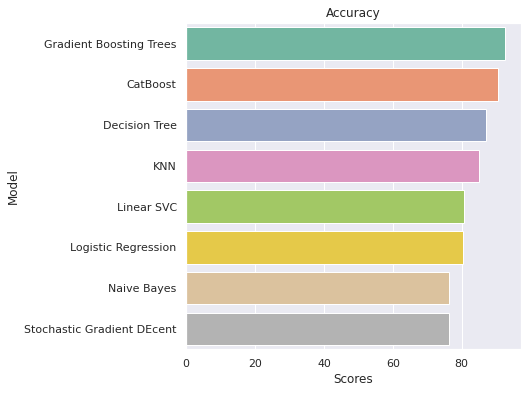

In [285]:
plt.figure(figsize=(6,6))
sns.barplot(x='Scores', y='Model', data=models.sort_values(by='Scores',ascending=False)[['Model', 'Scores']], palette="Set2").set(title='Accuracy');

### Accuracy with crossvalidation ranking

In [286]:
cv_models = pd.DataFrame({
    'Model' : ['KNN', 'Logistic Regression', 'Naive Bayes',
               'Stochastic Gradient DEcent', 'Linear SVC',
               'Decision Tree', 'Gradient Boosting Trees',
               'CatBoost'],
    'Scores': [
        acc_cv_knn,
        acc_cv_log,
        acc_cv_gaussian,
        acc_cv_sgd,
        acc_cv_svc,
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print("---Cross-validation Accuracy Scores---")
cv_models.sort_values(by='Scores',ascending=False)

---Cross-validation Accuracy Scores---


Model  Scores
6     Gradient Boosting Trees   83.50
0                         KNN   82.49
5               Decision Tree   82.38
7                    CatBoost   81.48
4                  Linear SVC   80.25
1         Logistic Regression   79.57
3  Stochastic Gradient DEcent   77.10
2                 Naive Bayes   76.09

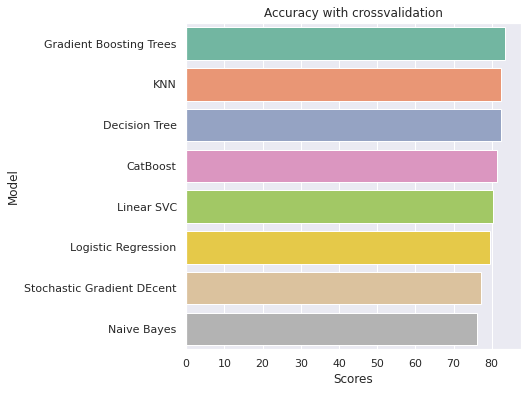

In [287]:
plt.figure(figsize=(6,6))
sns.barplot(x='Scores', y='Model', data=cv_models.sort_values(by='Scores',ascending=False)[['Model', 'Scores']], palette="Set2").set(title='Accuracy with crossvalidation');

## Feature Importance
Which features of the best model were most important for making predictions?

In [288]:
# Feature importance
'''
Function to show which features are most important in the model.
::param_model:: Which model to use?
::param_data:: What data to use?
'''
def feature_importance(model, data):
    fea_imp=pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp =fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _= fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10,5), colormap = "Set2").set(title='Feature importance')
    
    return fea_imp

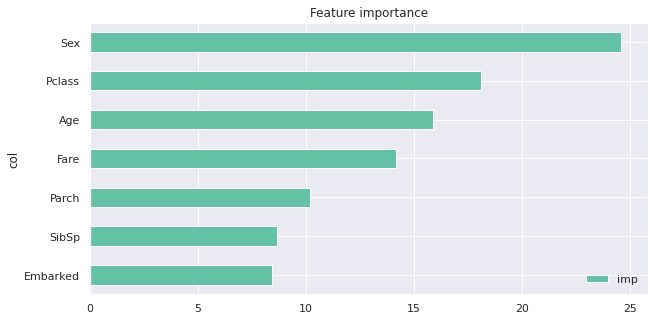

In [289]:
# plot the feature importance scores for CatBoost
feature_importance(catboost_model, X_train);

In [290]:
# Gradien Boost other metrics
gbc_model = GradientBoostingClassifier(learning_rate=0.2, loss='exponential').fit(X_train_scaled, y_train)
acc_gbc2 = round(gbc_model.score(X_train_scaled, y_train) * 100, 2)
    
# Cross Validaton
train_pred= model_selection.cross_val_predict(GradientBoostingClassifier(learning_rate=0.2, loss='exponential'),
                                              X_train_scaled,
                                              y_train,
                                              cv=10,
                                              n_jobs=-1)
# Cross validation accuracy metric
acc_cv_gbc2 = round(metrics.accuracy_score(y_train, train_pred) *100, 2)
    
print('acc_gbc2: {}'.format(acc_gbc2))
print('acc_cv_gbc2: {}'.format(acc_cv_gbc2))
print('Preciosn: {}'.format(precision_score(y_train, train_pred)))
print('F1_score: {}'.format(f1_score(y_train, train_pred)))
print('Recall: {}'.format(recall_score(y_train, train_pred)))

acc_gbc2: 90.8
acc_cv_gbc2: 83.16
Preciosn: 0.82
F1_score: 0.7663551401869159
Recall: 0.7192982456140351


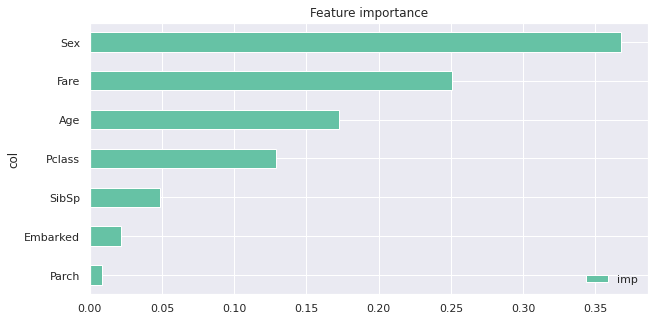

In [291]:
# plot the feature importance scores for GradientBoost
feature_importance(gbc_model, X_train);

In [292]:
# Decision Tree other metrics
dt_model = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=9, 
                                  max_features='log2', 
                                  splitter='best', 
                                  min_samples_split=3, 
                                  min_samples_leaf=3).fit(X_train_scaled, y_train)
acc_dt2 = round(dt_model.score(X_train_scaled, y_train) * 100, 2)
    
# Cross Validaton
train_pred= model_selection.cross_val_predict(DecisionTreeClassifier(criterion='entropy', 
                                                                      max_depth=9, 
                                                                      max_features='log2', 
                                                                      splitter='best', 
                                                                      min_samples_split=3, 
                                                                      min_samples_leaf=3),
                                              X_train_scaled,
                                              y_train,
                                              cv=10,
                                              n_jobs=-1)
# Cross validation accuracy metric
acc_cv_dt2 = round(metrics.accuracy_score(y_train, train_pred) *100, 2)
    
print('acc_gbc2: {}'.format(acc_dt2))
print('acc_cv_gbc2: {}'.format(acc_cv_dt2))
print('Precision: {}'.format(precision_score(y_train, train_pred)))
print('F1_score: {}'.format(f1_score(y_train, train_pred)))
print('Recall: {}'.format(recall_score(y_train, train_pred)))

acc_gbc2: 83.73
acc_cv_gbc2: 79.91
Precision: 0.7859649122807018
F1_score: 0.7145135566188198
Recall: 0.6549707602339181


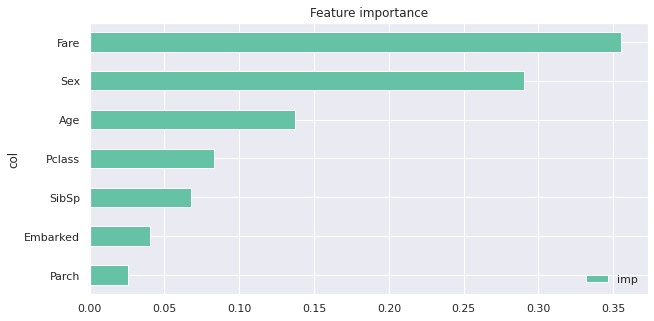

In [299]:
# plot the feature importance scores for Decision Tree
feature_importance(dt_model, X_train);

In [294]:
# K-Nearest Neighbours
start_time = time.time()
knn_model = KNeighborsClassifier(algorithm='brute', 
                                 n_neighbors=9, 
                                 weights='uniform', 
                                 p=1).fit(X_train_scaled, y_train)
acc_knn = round(knn_model.score(X_train_scaled, y_train) * 100, 2)

# Cross Validaton
train_pred= model_selection.cross_val_predict(KNeighborsClassifier(algorithm='brute', 
                                                                     n_neighbors=9, 
                                                                     weights='uniform', 
                                                                     p=1),
                                              X_train_scaled,
                                              y_train,
                                              cv=10,
                                              n_jobs=-1)
# Cross validation accuracy metric
acc_cv_knn = round(metrics.accuracy_score(y_train, train_pred) *100, 2)
    
print('acc_knn: {}'.format(acc_knn))
print('acc_cv_knn: {}'.format(acc_cv_knn))
print('Precision: {}'.format(precision_score(y_train, train_pred)))
print('F1_score: {}'.format(f1_score(y_train, train_pred)))
print('Recall: {}'.format(recall_score(y_train, train_pred)))

acc_knn: 84.96
acc_cv_knn: 82.49
Precision: 0.8141891891891891
F1_score: 0.7554858934169278
Recall: 0.7046783625730995


In [301]:
# Catboost other metrics
other_metrics = ['Precision', 'Recall', 'F1']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=other_metrics,
                                           plot=True)

for metric in other_metrics:
    print(str(metric)+': {}'.format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.9068545170614375
Recall: 0.7460409356725147
F1: 0.8176427379032648


## Submission

In [302]:
df_con_enc.head()

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         0       2    1   22      1      0    18         2
1         1       0    0   38      1      0   207         0
2         1       2    0   26      0      0    41         2
3         1       0    0   35      1      0   189         2
4         0       2    1   35      0      0    43         2

In [303]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [304]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [305]:
mean_age_by_pclass_sex_t=test.dropna().groupby(["Pclass","Sex"])['Age'].mean()

In [306]:
def categorise_test(row):
  if np.isnan(row['Age']):
    if row['Pclass'] == 1 and row['Sex'] == 'female':
      return mean_age_by_pclass_sex_t[1].female
    if row['Pclass'] == 1 and row['Sex'] == 'male':
      return mean_age_by_pclass_sex_t[1].male
    if row['Pclass'] == 2 and row['Sex'] == 'female':
      return mean_age_by_pclass_sex_t[2].female
    if row['Pclass'] == 2 and row['Sex'] == 'male':
      return mean_age_by_pclass_sex_t[2].male
    if row['Pclass'] == 3 and row['Sex'] == 'female':
      return mean_age_by_pclass_sex_t[3].female
    if row['Pclass'] == 3 and row['Sex'] == 'male':
      return mean_age_by_pclass_sex_t[3].male
  else:
    return row['Age']

In [307]:
test['Age_Full'] = test.apply(lambda row: categorise_test(row), axis=1)
test['Age_Full'] = test['Age_Full'].astype('int')
test.drop('Age', axis=1, inplace=True)
test.rename(columns = {'Age_Full': 'Age'}, inplace=True)

In [308]:
# Fill the gaps
test['Embarked'].fillna(value="S", inplace=True)

In [309]:
# Ceate a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [310]:
test.shape

(418, 11)

In [311]:
test_scaled = sc.fit_transform(test[wanted_test_columns].apply(LabelEncoder().fit_transform))
test_scaled.shape

(418, 7)

In [312]:
test_scaled

array([[ 0.87348191,  0.75592895,  0.42168576, ..., -0.42394557,
        -0.94808168, -0.47091535],
       [ 0.87348191, -1.32287566,  1.35620471, ..., -0.42394557,
        -1.33652909,  0.70076689],
       [-0.31581919,  0.75592895,  2.29072365, ..., -0.42394557,
        -0.60052346, -0.47091535],
       ...,
       [ 0.87348191,  0.75592895,  0.70923005, ..., -0.42394557,
        -1.25475069,  0.70076689],
       [ 0.87348191,  0.75592895, -0.22528889, ..., -0.42394557,
        -0.80496947,  0.70076689],
       [ 0.87348191,  0.75592895, -0.22528889, ...,  0.68361223,
         0.27859437, -1.64259759]])

In [313]:
# Make a prediction using the CatBoost classifier() model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns].apply(LabelEncoder().fit_transform))

In [314]:
# Make a prediction using the Gradien Boost classifier() model on the wanted columns
predictions = gbc_model.predict(test_scaled)

In [315]:
# Make a prediction using the Decision Tree classifier() model on the wanted columns
predictions = dt_model.predict(test_scaled)

In [ ]:
predictions

In [ ]:
# Create a submision dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions
submission.info()

In [ ]:
# Are our test and submision dataframe the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframe mismatched, won't be able to submit to Kaggle.")

In [ ]:
# Convert submision dataframe to csv for submission to csv for Kaggle submission
submission.to_csv('./dt_v5_submission.csv', index=False)
print('Submission CSV is ready!')